In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df = df.rename(columns={'RegionName': 'zipcode'})

In [5]:
df['zipcode'] = df['zipcode'].astype(str).str.zfill(5)

In [6]:
df['five_year'] = ((df['2018-04']/df['2013-04'])-1)*100

In [7]:
df.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,26.082701
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,53.384175
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,28.315830
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,25.878840
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,7.048458


In [8]:
df[['zipcode','City','State','five_year']].sort_values(by=['five_year'],ascending=False).head(20)

,zipcode,City,State,five_year
7302,80216,Denver,CO,173.872951
1477,94601,Oakland,CA,167.943262
5830,48240,Redford,MI,161.224490
1239,94590,Vallejo,CA,159.379310
2661,33705,Saint Petersburg,FL,159.210526
6105,37210,Nashville,TN,155.932203
2627,33460,Lake Worth,FL,153.647059
6563,15201,Pittsburgh,PA,147.593583
475,11216,New York,NY,147.591761
1835,37207,Nashville,TN,146.683047


In [9]:
lake_worth = df.loc[df['zipcode'] == '33460']

In [10]:
lake_worth.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
2627,72619,33460,Lake Worth,FL,Miami-Fort Lauderdale,Palm Beach,2628,59800.0,59900.0,60000.0,...,195500,198400,200400,202600,206000,209600,211600,213300,215600,153.647059


In [11]:
lake_worth = lake_worth.iloc[:,7:-1]

In [12]:
lake_worth.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
2627,59800.0,59900.0,60000.0,60200.0,60400.0,60700.0,61000.0,61300.0,61800.0,62400.0,...,191300,195500,198400,200400,202600,206000,209600,211600,213300,215600


In [13]:
lake_worth = lake_worth.T

In [14]:
lake_worth.head()

,2627
1996-04,59800.0
1996-05,59900.0
1996-06,60000.0
1996-07,60200.0
1996-08,60400.0


In [15]:
type(lake_worth)

pandas.core.frame.DataFrame

In [16]:
lake_worth = lake_worth.rename(columns={2627:'home price'})

In [17]:
lake_worth.head()

,home price
1996-04,59800.0
1996-05,59900.0
1996-06,60000.0
1996-07,60200.0
1996-08,60400.0


In [18]:
lake_worth.index = lake_worth.index.astype('datetime64[ns]')

In [19]:
lake_worth.index.dtype

dtype('<M8[ns]')

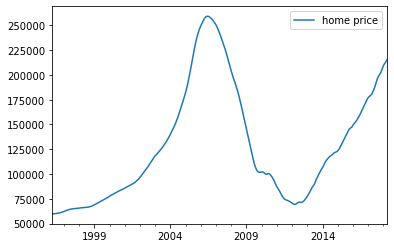

In [20]:
lake_worth.plot();

In [21]:
lake_worth['diff'] = lake_worth.diff()

In [22]:
lake_worth.head()

,home price,diff
1996-04-01,59800.0,NaN
1996-05-01,59900.0,100.0
1996-06-01,60000.0,100.0
1996-07-01,60200.0,200.0
1996-08-01,60400.0,200.0


In [23]:
lake_worth['home price shifted'] = lake_worth['home price'].shift()

In [24]:
lake_worth.tail()

,home price,diff,home price shifted
2017-12-01,206000.0,3400.0,202600.0
2018-01-01,209600.0,3600.0,206000.0
2018-02-01,211600.0,2000.0,209600.0
2018-03-01,213300.0,1700.0,211600.0
2018-04-01,215600.0,2300.0,213300.0


In [25]:
lake_worth['pct'] = lake_worth['diff']/lake_worth['home price shifted']

In [26]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-04-01,59800.0,NaN,NaN,NaN
1996-05-01,59900.0,100.0,59800.0,0.001672
1996-06-01,60000.0,100.0,59900.0,0.001669
1996-07-01,60200.0,200.0,60000.0,0.003333
1996-08-01,60400.0,200.0,60200.0,0.003322


In [27]:
lake_worth['5 year shift'] = lake_worth['home price'].shift(60)

In [28]:
lake_worth.head(61)

,home price,diff,home price shifted,pct,5 year shift
1996-04-01,59800.0,NaN,NaN,NaN,NaN
1996-05-01,59900.0,100.0,59800.0,0.001672,NaN
1996-06-01,60000.0,100.0,59900.0,0.001669,NaN
1996-07-01,60200.0,200.0,60000.0,0.003333,NaN
1996-08-01,60400.0,200.0,60200.0,0.003322,NaN
...,...,...,...,...,...
2000-12-01,85100.0,600.0,84500.0,0.007101,NaN
2001-01-01,85800.0,700.0,85100.0,0.008226,NaN
2001-02-01,86500.0,700.0,85800.0,0.008159,NaN
2001-03-01,87200.0,700.0,86500.0,0.008092,NaN


In [29]:
lake_worth['5 year return'] = ((lake_worth['home price']/lake_worth['5 year shift'])-1)*100

In [30]:
lake_worth.tail()

,home price,diff,home price shifted,pct,5 year shift,5 year return
2017-12-01,206000.0,3400.0,202600.0,0.016782,75800.0,171.767810
2018-01-01,209600.0,3600.0,206000.0,0.017476,77600.0,170.103093
2018-02-01,211600.0,2000.0,209600.0,0.009542,79800.0,165.162907
2018-03-01,213300.0,1700.0,211600.0,0.008034,82300.0,159.173755
2018-04-01,215600.0,2300.0,213300.0,0.010783,85000.0,153.647059


In [31]:
lake_worth.head()

,home price,diff,home price shifted,pct,5 year shift,5 year return
1996-04-01,59800.0,NaN,NaN,NaN,NaN,NaN
1996-05-01,59900.0,100.0,59800.0,0.001672,NaN,NaN
1996-06-01,60000.0,100.0,59900.0,0.001669,NaN,NaN
1996-07-01,60200.0,200.0,60000.0,0.003333,NaN,NaN
1996-08-01,60400.0,200.0,60200.0,0.003322,NaN,NaN


In [32]:
lw_dvar = lake_worth.dropna()

In [33]:
df_mean = pd.read_csv('../data/national.csv')

In [34]:
df_mean.head()

,Unnamed: 0,0
0,five-year 2001-04,35.180540
1,five-year 2001-05,35.760117
2,five-year 2001-06,36.308179
3,five-year 2001-07,36.831948
4,five-year 2001-08,37.328660


In [35]:
df_mean.iloc[:,1].values

array([ 35.18053985,  35.76011692,  36.30817887,  36.83194827,
        37.32865988,  37.8069953 ,  38.27221538,  38.73249943,
        39.111278  ,  39.4460225 ,  39.83724063,  40.30037615,
        40.72237946,  41.09422992,  41.43360942,  41.74907935,
        42.04327701,  42.33381627,  42.59648697,  42.99951262,
        43.39240939,  43.57326369,  43.62538032,  43.80738873,
        44.01288126,  44.2614003 ,  44.57818087,  44.96467443,
        45.38097162,  45.81328425,  46.21790364,  46.55667771,
        46.75474477,  46.89544351,  47.13687621,  47.55439538,
        48.08249299,  48.73351988,  49.51166504,  50.37375685,
        51.24110653,  52.09484394,  52.88972001,  53.56845997,
        54.0826896 ,  54.45101928,  54.77126623,  55.19703608,
        55.72187368,  56.2947537 ,  56.91857375,  57.56652767,
        58.15227369,  58.64489454,  58.99356943,  59.1596511 ,
        59.11005283,  58.88426206,  58.55733692,  58.27644121,
        58.01882505,  57.71987763,  57.34617398,  56.88

In [36]:
lw_dvar['mar'] = df_mean.iloc[:,1].values

<ipython-input-36-27c190f2f8ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_dvar['mar'] = df_mean.iloc[:,1].values


In [37]:
lw_dvar.tail()

,home price,diff,home price shifted,pct,5 year shift,5 year return,mar
2017-12-01,206000.0,3400.0,202600.0,0.016782,75800.0,171.767810,33.981388
2018-01-01,209600.0,3600.0,206000.0,0.017476,77600.0,170.103093,34.146081
2018-02-01,211600.0,2000.0,209600.0,0.009542,79800.0,165.162907,34.381704
2018-03-01,213300.0,1700.0,211600.0,0.008034,82300.0,159.173755,34.759700
2018-04-01,215600.0,2300.0,213300.0,0.010783,85000.0,153.647059,34.753288


In [38]:
lw_dvar['5 year minus mar'] = lw_dvar['5 year return'] - lw_dvar['mar']

<ipython-input-38-0dfe89c527e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_dvar['5 year minus mar'] = lw_dvar['5 year return'] - lw_dvar['mar']


In [39]:
lw_dvar.head()

,home price,diff,home price shifted,pct,5 year shift,5 year return,mar,5 year minus mar
2001-04-01,87900.0,700.0,87200.0,0.008028,59800.0,46.989967,35.180540,11.809427
2001-05-01,88500.0,600.0,87900.0,0.006826,59900.0,47.746244,35.760117,11.986127
2001-06-01,89200.0,700.0,88500.0,0.007910,60000.0,48.666667,36.308179,12.358488
2001-07-01,89900.0,700.0,89200.0,0.007848,60200.0,49.335548,36.831948,12.503600
2001-08-01,90700.0,800.0,89900.0,0.008899,60400.0,50.165563,37.328660,12.836903


In [40]:
lw_down = lw_dvar.loc[lw_dvar['5 year minus mar'] < 0]

In [41]:
lw_down['neg sq'] = lw_down['5 year minus mar']**2

<ipython-input-41-0c89c2b59d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lw_down['neg sq'] = lw_down['5 year minus mar']**2


In [42]:
lw_down.head(60)

,home price,diff,home price shifted,pct,5 year shift,5 year return,mar,5 year minus mar,neg sq
2008-11-01,157000.0,-5600.0,162600.0,-0.034440,135400.0,15.952733,17.238599,-1.285866,1.653453
2008-12-01,151400.0,-5600.0,157000.0,-0.035669,137700.0,9.949165,15.720866,-5.771701,33.312537
2009-01-01,145800.0,-5600.0,151400.0,-0.036988,140200.0,3.994294,14.278833,-10.284539,105.771752
2009-02-01,140000.0,-5800.0,145800.0,-0.039781,142800.0,-1.960784,12.781582,-14.742366,217.337355
2009-03-01,134100.0,-5900.0,140000.0,-0.042143,145300.0,-7.708190,11.216123,-18.924312,358.129603
2009-04-01,128300.0,-5800.0,134100.0,-0.043251,148000.0,-13.310811,9.559015,-22.869825,523.028912
2009-05-01,122300.0,-6000.0,128300.0,-0.046765,150900.0,-18.952949,7.756262,-26.709211,713.381926
2009-06-01,116400.0,-5900.0,122300.0,-0.048242,154200.0,-24.513619,5.900281,-30.413899,925.005271
2009-07-01,111200.0,-5200.0,116400.0,-0.044674,157800.0,-29.531052,4.223820,-33.754872,1139.391366
2009-08-01,107100.0,-4100.0,111200.0,-0.036871,161700.0,-33.766234,2.755476,-36.521709,1333.835252


In [43]:
lw_down.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2008-11-01 to 2014-06-01
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   home price          68 non-null     float64
 1   diff                68 non-null     float64
 2   home price shifted  68 non-null     float64
 3   pct                 68 non-null     float64
 4   5 year shift        68 non-null     float64
 5   5 year return       68 non-null     float64
 6   mar                 68 non-null     float64
 7   5 year minus mar    68 non-null     float64
 8   neg sq              68 non-null     float64
dtypes: float64(9)
memory usage: 5.3 KB


In [44]:
import numpy as np

np.sqrt(lw_down['neg sq'].sum()/lw_dvar['mar'].count())

23.95856075385832

In [45]:
lw_var = lake_worth['5 year return'].dropna()

In [46]:
lw_var.std()

85.07622645166362

In [47]:
lw_var.mean()

54.0368829557541

In [48]:
lw_var.describe()

count    205.000000
mean      54.036883
std       85.076226
min      -71.832123
25%      -33.766234
50%       57.728707
75%      125.664894
max      192.718999
Name: 5 year return, dtype: float64

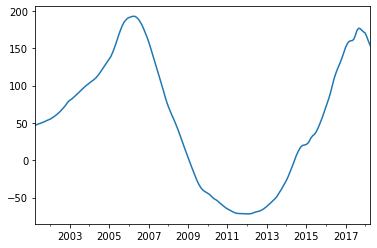

In [49]:
lw_var.plot();

In [50]:
lake_worth = lake_worth.dropna()

In [51]:
lake_worth.head()

,home price,diff,home price shifted,pct,5 year shift,5 year return
2001-04-01,87900.0,700.0,87200.0,0.008028,59800.0,46.989967
2001-05-01,88500.0,600.0,87900.0,0.006826,59900.0,47.746244
2001-06-01,89200.0,700.0,88500.0,0.007910,60000.0,48.666667
2001-07-01,89900.0,700.0,89200.0,0.007848,60200.0,49.335548
2001-08-01,90700.0,800.0,89900.0,0.008899,60400.0,50.165563


In [52]:
lake_worth_pct = lake_worth.drop(['home price','diff','home price shifted'],axis=1)

In [53]:
lake_worth_pct.head()

,pct,5 year shift,5 year return
2001-04-01,0.008028,59800.0,46.989967
2001-05-01,0.006826,59900.0,47.746244
2001-06-01,0.007910,60000.0,48.666667
2001-07-01,0.007848,60200.0,49.335548
2001-08-01,0.008899,60400.0,50.165563


In [54]:
lake_worth_pct = lake_worth_pct['2013-04':]

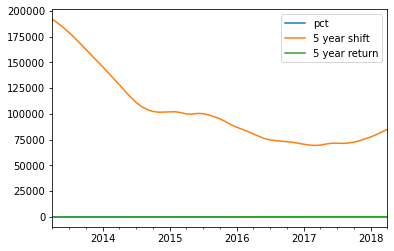

In [55]:
lake_worth_pct.plot();

In [56]:
from statsmodels.tsa.stattools import adfuller

In [57]:
adfuller(lake_worth_pct)

ValueError: x is required to have ndim 1 but has ndim 2

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
cutoff = '2017-05'
train = lake_worth_pct[:cutoff]
test = lake_worth_pct[cutoff:]

In [ ]:
#Plot_acf is used to identify the q parameter
plot_acf(train);

In [ ]:
plot_pacf(train,method='ywm')

In [ ]:
ar_1 = ARIMA(train, order=(1, 0, 1)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
train_pred = ar_1.predict()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(train, train_pred))

In [ ]:
ar_1.summary()

In [ ]:
y_pred = ar_1.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ar_1.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train, color = "black",label='Train')
plt.plot(test, color = "red",label='Test')
plt.ylabel('Monthly % Return')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Home Price Monthly Return Data")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend();